<a href="https://colab.research.google.com/github/AsmitaVikram/Monitoring-crop-distribution-using-satellite-imagery/blob/main/crop_distribution_monitoring_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 70.2 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.plot import show
from rasterio.features import shapes
import numpy as np
from skimage.segmentation import slic
import matplotlib.pyplot as plt




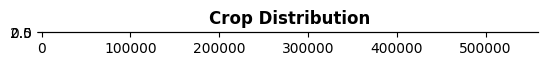

Crop Type 1: Area = 101.88 hectares
Crop Type 2: Area = 101.88 hectares
Crop Type 3: Area = 101.88 hectares
Crop Type 4: Area = 101.88 hectares
Crop Type 5: Area = 101.88 hectares
Crop Type 6: Area = 101.87 hectares
Crop Type 7: Area = 101.90 hectares
Crop Type 8: Area = 101.88 hectares
Crop Type 9: Area = 101.85 hectares
Crop Type 10: Area = 101.88 hectares
Crop Type 11: Area = 101.88 hectares
Crop Type 12: Area = 101.88 hectares
Crop Type 13: Area = 101.90 hectares
Crop Type 14: Area = 101.90 hectares
Crop Type 15: Area = 101.88 hectares
Crop Type 16: Area = 101.88 hectares
Crop Type 17: Area = 101.88 hectares
Crop Type 18: Area = 101.87 hectares
Crop Type 19: Area = 101.91 hectares
Crop Type 20: Area = 101.87 hectares
Crop Type 21: Area = 101.89 hectares
Crop Type 22: Area = 101.87 hectares
Crop Type 23: Area = 101.88 hectares
Crop Type 24: Area = 101.88 hectares
Crop Type 25: Area = 101.88 hectares
Crop Type 26: Area = 101.90 hectares
Crop Type 27: Area = 101.87 hectares
Crop Type 

In [ ]:
def crop_distribution_monitoring(image_path):
    with rasterio.open(image_path) as src:   # Read the GeoTIFF image
        image = src.read()

    # Convert the image from 3D to 2D array (height, width, bands) -> (bands, height*width)
    image_reshaped = image.reshape(image.shape[0], -1)

    # Perform image segmentation using SLIC(Simple Linear Iterative Clustering)
    # Adjust the n_segments parameter based on the expected number of crops in the image
    segments = slic(image_reshaped, n_segments=100, compactness=10, sigma=1)

    # Calculate the area of each segment (crop region) in pixels
    segment_areas = [np.sum(segments == segment_id) for segment_id in np.unique(segments)]

    # Get unique crop types present in the image
    unique_crop_types = np.unique(segments)

    # Calculate the area of each crop type in hectares(assuming pixel size in meters)
    pixel_size_meters = src.res[0]  # Assuming square pixels (x and y resolution are the same)
    pixel_size_hectares = pixel_size_meters * 0.0001  # Convert pixel size to hectares
    crop_type_areas = [area * pixel_size_hectares for area in segment_areas]

    # Display the segmented image
    show(segments, cmap='tab20', title='Crop Distribution')

    # Print crop type and its corresponding area in hectares
    for i, crop_type in enumerate(unique_crop_types):
        print(f"Crop Type {crop_type}: Area = {crop_type_areas[i]:.2f} hectares")



# Call the function with the image path
image_path = "/content/Delhi.tiff"
crop_distribution_monitoring(image_path)

